<center><h1>Oversampling</h1>
John Ignacio R.M. 30 Jun 2020</center>

In [32]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada2.data import read_dataset, split_dataset, rotate_vectors
from ada2.model import BinClassifModel3 as BC3, BinClassifModelV1 as BC1
from ada2.plot import plot_confidence_matrix
import pandas as pd
import numpy as np
from os.path import exists
from imblearn.over_sampling import SMOTE

#keras
from keras.optimizers import adam, adadelta, adagrad, adamax
from keras.backend import clear_session
import gc

In [33]:
source_path = "../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

In [34]:
#read xtohh dataset SR 2
df = read_dataset(source_path, signal, bg, "SR", 2)
df

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.887240,1631.67020,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.033330,1293.40280,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.559220,1659.84830,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.607220,1075.30920,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.350300,1595.76110,244.283460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0.006433,0,402.06714,0.109710,-1.277847,68576.34,486.71262,-0.060529,1.469456,120999.410,2.747302,2.752572,-0.883233,84.210686,891.92240,192.862270
8802,0.004849,0,542.29900,1.579771,-2.624035,84161.26,411.07132,1.205967,0.438185,56194.777,3.062220,3.084951,-0.216563,59.169407,970.41110,136.471160
8803,0.004849,0,548.63104,-0.033452,2.621298,79095.04,416.03915,0.336025,-0.553298,70408.830,3.108589,3.130470,-0.352454,34.371227,983.20233,133.526060
8804,0.007816,0,683.98340,-0.029910,-0.760806,110728.80,609.47140,0.094448,2.401307,148632.220,3.121072,3.123549,0.351719,55.616740,1320.47700,75.680750


In [35]:
sets = split_dataset(df, *(0.6, 0.2, 0.2), seed)

In [36]:
x = sets["x"]["train"]
y = sets["y"]["train"]
w = sets["w"]["train"]
x.shape

(5283, 14)

In [37]:
x_res, y_res = SMOTE(0.2, random_state = seed).fit_resample(x, y)
w_mean = w.mean()
y_res = rotate_vectors([y_res])[0]
w_res = np.concatenate([w, np.full((x_res.shape[0]- x.shape[0], ), w_mean)])

In [38]:
print(x_res.shape, y_res.shape, w_res.shape)

(6147, 14) (6147, 1) (6147,)


## Model trained in normal data

In [39]:
model = BC1(x_res.shape[1])
model.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50, verbose = 2,
)

Train on 5283 samples, validate on 1761 samples
Epoch 1/50
 - 1s - loss: 0.0053 - val_loss: 3.9686e-04
Epoch 2/50
 - 1s - loss: 8.0897e-04 - val_loss: 3.9623e-04
Epoch 3/50
 - 1s - loss: 8.0211e-04 - val_loss: 4.8212e-04
Epoch 4/50
 - 1s - loss: 7.8153e-04 - val_loss: 3.8451e-04
Epoch 5/50
 - 1s - loss: 7.2248e-04 - val_loss: 3.4860e-04
Epoch 6/50
 - 1s - loss: 5.0711e-04 - val_loss: 1.2098e-04
Epoch 7/50
 - 1s - loss: 4.4981e-04 - val_loss: 1.8508e-04
Epoch 8/50
 - 1s - loss: 3.8267e-04 - val_loss: 1.7374e-04
Epoch 9/50
 - 1s - loss: 3.8030e-04 - val_loss: 9.3709e-05
Epoch 10/50
 - 1s - loss: 3.5906e-04 - val_loss: 8.0215e-05
Epoch 11/50
 - 1s - loss: 3.8072e-04 - val_loss: 3.7002e-04
Epoch 12/50
 - 1s - loss: 3.8997e-04 - val_loss: 8.5752e-05
Epoch 13/50
 - 1s - loss: 3.1583e-04 - val_loss: 9.8811e-05
Epoch 14/50
 - 1s - loss: 3.0364e-04 - val_loss: 7.8796e-05
Epoch 15/50
 - 1s - loss: 2.9693e-04 - val_loss: 9.9975e-05
Epoch 16/50
 - 1s - loss: 3.2621e-04 - val_loss: 7.0144e-05
Epoch

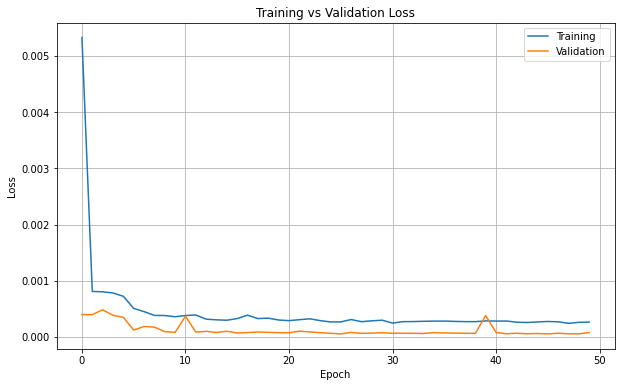

In [40]:
model.plot_loss()

In [41]:
eval = model.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4,
)
print("Accuracy:", eval["accuracy"])
pd.DataFrame(eval["weighted_class_report"])

Accuracy: 0.9733257661748014


,0,1,macro avg,weighted avg
precision,0.918165,0.967743,0.942954,0.959398
recall,0.837804,0.984887,0.911345,0.960128
f1-score,0.876146,0.976240,0.926193,0.959391
support,0.392325,1.938392,2.330717,2.330717


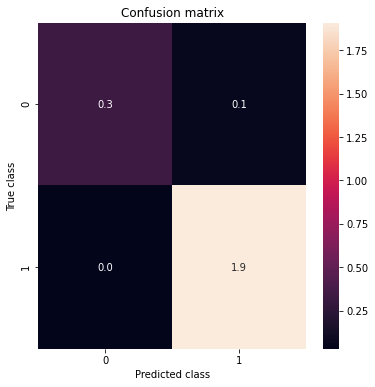

In [42]:
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')

## Model trained in resampled data

In [43]:
model_res = BC1(x_res.shape[1])
model_res.fit(
    x_res, y_res, w_res,
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50, verbose = 2,
)

Train on 6147 samples, validate on 1761 samples
Epoch 1/50
 - 1s - loss: 0.0041 - val_loss: 5.7822e-04
Epoch 2/50
 - 1s - loss: 9.5944e-04 - val_loss: 5.8263e-04
Epoch 3/50
 - 1s - loss: 9.4999e-04 - val_loss: 5.9147e-04
Epoch 4/50
 - 1s - loss: 9.3631e-04 - val_loss: 5.2498e-04
Epoch 5/50
 - 1s - loss: 9.3929e-04 - val_loss: 4.8096e-04
Epoch 6/50
 - 1s - loss: 8.6619e-04 - val_loss: 3.8984e-04
Epoch 7/50
 - 1s - loss: 6.5601e-04 - val_loss: 1.4624e-04
Epoch 8/50
 - 1s - loss: 5.2403e-04 - val_loss: 2.8121e-04
Epoch 9/50
 - 1s - loss: 4.9345e-04 - val_loss: 2.1897e-04
Epoch 10/50
 - 1s - loss: 5.4838e-04 - val_loss: 1.9863e-04
Epoch 11/50
 - 1s - loss: 4.6762e-04 - val_loss: 1.2602e-04
Epoch 12/50
 - 1s - loss: 4.1621e-04 - val_loss: 1.1622e-04
Epoch 13/50
 - 1s - loss: 4.4560e-04 - val_loss: 1.6064e-04
Epoch 14/50
 - 1s - loss: 4.4464e-04 - val_loss: 1.8061e-04
Epoch 15/50
 - 1s - loss: 4.2651e-04 - val_loss: 1.6895e-04
Epoch 16/50
 - 1s - loss: 4.2077e-04 - val_loss: 1.5095e-04
Epoch

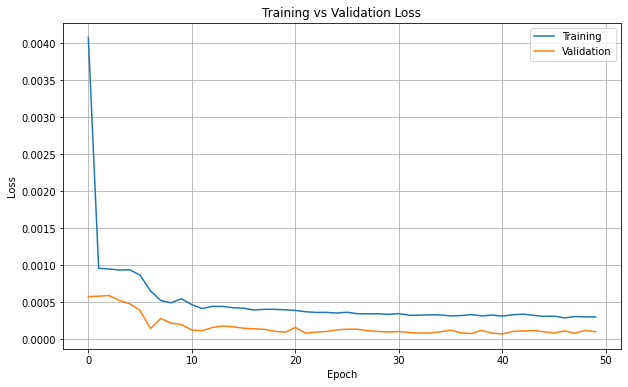

In [44]:
model_res.plot_loss()

In [45]:
eval_res = model_res.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4,
)
print("Accuracy:", eval_res["accuracy"])

Accuracy: 0.9659477866061293


In [46]:
pd.DataFrame(eval_res["weighted_class_report"])

,0,1,macro avg,weighted avg
precision,0.884419,0.973090,0.928755,0.958164
recall,0.866500,0.977081,0.921790,0.958467
f1-score,0.875368,0.975081,0.925225,0.958297
support,0.392325,1.938392,2.330717,2.330717


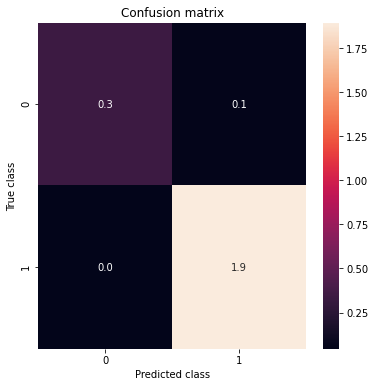

In [47]:
plot_confidence_matrix(eval_res["weighted_cm"], 6, 6, '.1f')

### Analysis

Oversampling data makes the model behave poorly. This might be due to the lack of precision to imitate the background data.